In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling
%matplotlib inline

In [ ]:
train_ = pd.read_csv('./data/train.csv',index_col=0)
test_ = pd. read_csv('./data/test.csv',index_col=0)
sample_submission = pd.read_csv('./data/sample_submission.csv', index_col=0)

데이터 설명

-     대전지역에서 측정한 실내외 19곳의 센서데이터와, 주변 지역의 기상청 공공데이터를 semi-비식별화하여 제공합니다. 
-     센서는 온도를 측정하였습니다. 
-     모든 데이터는 시간 순으로 정렬 되어 있으며 10분 단위 데이터 입니다. 
-     예측 대상(target variable)은 Y18입니다. 

train.csv 

-     30일 간의 기상청 데이터 (X00 ~ X39) 및 센서데이터 (Y00~Y17)
-     이후 3일 간의 기상청 데이터 (X00~X39) 및 센서데이터 (Y18)

test.csv 
-     train.csv 기간 이후 80일 간의 기상청 데이터 (X00~X39)

sample_submission.csv
-     제출 양식 예시

X00 X07 X28 X31 X32 기온  
X01 X06 X22 X27 X29 기압  (~1000)
X02 X03 X18 X24 X26 풍속  
X04 X10 X21 X36 X39 누적강수량  
X05 X08 X09 X23 X33 해면기압  ( ~1000)
X11 X14 X16 X19 X34 누적일사량  
X12, X20, X30, X37 X38 습도
X13 X15 X17 X25 X35 풍향  

Y00~17 센서측정온도  

In [3]:
train=train_.copy()
test=test_.copy()

In [5]:
train.iloc[:,:10].describe()

,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,20.227904,988.621107,1.509764,1.453157,1.270223,1008.333902,989.005093,21.658081,1008.790341,1008.394171
std,4.707570,3.359916,1.071858,0.936151,4.429852,3.395037,3.403714,4.377216,3.520317,3.546180
min,8.300000,977.300000,0.000000,0.000000,0.000000,997.200000,978.100000,11.600000,997.300000,996.300000
25%,16.900000,986.800000,0.700000,0.800000,0.000000,1006.500000,987.100000,18.400000,1006.700000,1006.300000
50%,19.900000,988.600000,1.300000,1.300000,0.000000,1008.500000,989.100000,21.200000,1008.800000,1008.400000
75%,24.100000,991.000000,2.100000,2.000000,0.000000,1010.800000,991.600000,24.825000,1011.400000,1010.900000
max,30.900000,997.200000,10.200000,5.800000,25.600000,1016.800000,997.400000,32.700000,1017.500000,1018.000000


In [6]:
train.iloc[:,10:20].describe()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.0,4752.000000,4752.0,4752.000000,4752.000000,4752.0
mean,1.006734,11.008479,68.209827,161.357639,0.0,174.346654,0.0,161.823864,1.377462,0.0
std,3.324415,10.873539,22.278053,98.787460,0.0,97.785811,0.0,115.943382,1.155024,0.0
min,0.000000,0.000000,16.400000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
25%,0.000000,0.020000,49.500000,69.225000,0.0,115.600000,0.0,33.875000,0.500000,0.0
50%,0.000000,7.690000,72.150000,182.600000,0.0,170.250000,0.0,190.450000,1.000000,0.0
75%,0.000000,22.190000,89.025000,228.925000,0.0,258.400000,0.0,253.125000,2.100000,0.0
max,18.500000,30.700000,97.900000,360.000000,0.0,359.900000,0.0,360.000000,8.900000,0.0


In [7]:
train.iloc[:,20:30].describe()

,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,71.478872,1.138363,1001.773190,1008.850989,0.985059,139.524453,1.369886,1007.554924,22.079040,1000.811932
std,21.830446,4.079039,3.367735,3.417633,1.091314,131.438036,1.240900,3.446475,4.225203,3.390206
min,19.700000,0.000000,990.800000,997.500000,0.000000,0.000000,0.000000,997.200000,10.300000,989.700000
25%,53.075000,0.000000,999.900000,1006.900000,0.000000,0.000000,0.300000,1005.500000,19.000000,998.900000
50%,74.200000,0.000000,1001.900000,1008.900000,0.700000,134.150000,1.100000,1007.700000,21.700000,1000.900000
75%,92.600000,0.000000,1004.200000,1011.400000,1.700000,270.900000,2.100000,1010.200000,25.200000,1003.400000
max,97.900000,21.000000,1010.100000,1017.100000,6.000000,359.900000,6.800000,1015.400000,33.200000,1009.000000


In [8]:
train.iloc[:,30:40].describe()

,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,65.657639,19.846528,20.012984,1009.074747,11.567563,208.400505,1.533817,65.918771,58.178704,1.083123
std,21.525699,5.520259,5.271630,3.440669,11.386727,99.580562,5.578607,19.527173,18.368285,4.617366
min,17.400000,5.300000,5.500000,998.700000,0.000000,0.000000,0.000000,17.500000,17.900000,0.000000
25%,48.075000,16.000000,16.300000,1007.075000,0.030000,155.300000,0.000000,51.500000,44.600000,0.000000
50%,69.400000,19.400000,19.600000,1009.200000,8.210000,240.850000,0.000000,67.300000,59.100000,0.000000
75%,85.600000,24.100000,24.100000,1011.700000,22.562500,277.800000,0.000000,81.900000,72.700000,0.000000
max,97.200000,33.100000,32.900000,1016.800000,32.240000,359.900000,33.600000,97.800000,94.800000,28.000000


In [9]:
name1='Temp'
name2='Press'
name3='WindSpeed'
name4='Accum_Precipi'
name5='SeaLevel_Press'
name6='Accum_SolarRadi'
name7='Humidi'
name8='WindDirect'

X00 X07 X28 X31 X32 기온  
X01 X06 X22 X27 X29 기압  (~1000)  
X02 X03 X18 X24 X26 풍속  
X04 X10 X21 X36 X39 누적강수량  
X05 X08 X09 X23 X33 해면기압  ( ~1000)  
X11 X14 X16 X19 X34 누적일사량  
X12, X20, X30, X37 X38 습도
X13 X15 X17 X25 X35 풍향  

In [10]:
sens='SenTemp'

In [11]:
train = train.rename(columns={'X00':name1, 'X07':name1, 'X28':name1, 'X31':name1, 'X32':name1})
train = train.rename(columns={'X01':name2, 'X06':name2, 'X22':name2, 'X27':name2, 'X29':name2})
train = train.rename(columns={'X02':name1, 'X03':name3, 'X18':name3, 'X24':name3, 'X26':name3})
train = train.rename(columns={'X04':name2, 'X10':name4, 'X21':name4, 'X36':name4, 'X39':name4})
train = train.rename(columns={'X05':name5, 'X08':name5, 'X09':name5, 'X23':name5, 'X33':name5})
train = train.rename(columns={'X11':name6, 'X14':name6, 'X16':name5, 'X19':name6, 'X34':name6})
train = train.rename(columns={'X12':name7, 'X20':name7, 'X30':name7, 'X37':name7, 'X38':name7})
train = train.rename(columns={'X13':name8, 'X15':name8, 'X17':name8, 'X25':name8, 'X35':name8})

In [12]:
train = train.rename(columns={'Y00':sens+'1', 'Y01':sens+'2', 'Y02':sens+'3', 'Y03':sens+'4', 'Y04':sens+'5', 'Y05':sens+'6', 'Y06':sens+'7', \
                                                'Y07':sens+'8','Y08':sens+'9', 'Y09':sens+'10', 'Y10':sens+'11', 'Y11':sens+'12','Y12':sens+'13', 'Y13':sens+'14', \
                                                'Y14':sens+'15', 'Y15':sens+'16', 'Y16':sens+'17', 'Y17':sens+'18'})

In [13]:
train_['X10']

id
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4747    2.5
4748    2.5
4749    2.5
4750    2.5
4751    2.5
Name: X10, Length: 4752, dtype: float64

In [14]:
# pr1=test.profile_report()
# pr1.to_file('./test_report.html') # pr_report.html 파일로 저장

# pr2=train.profile_report()
# pr2.to_file('./train_report.html') # pr_report.html 파일로 저장

In [15]:
# corr = train.corr()
# cmap = sns.color_palette("Blues")
# f, ax = plt.subplots(figsize=(20, 12))
# sns.heatmap(corr, cmap=cmap, annot=True, fmt = ".2f")

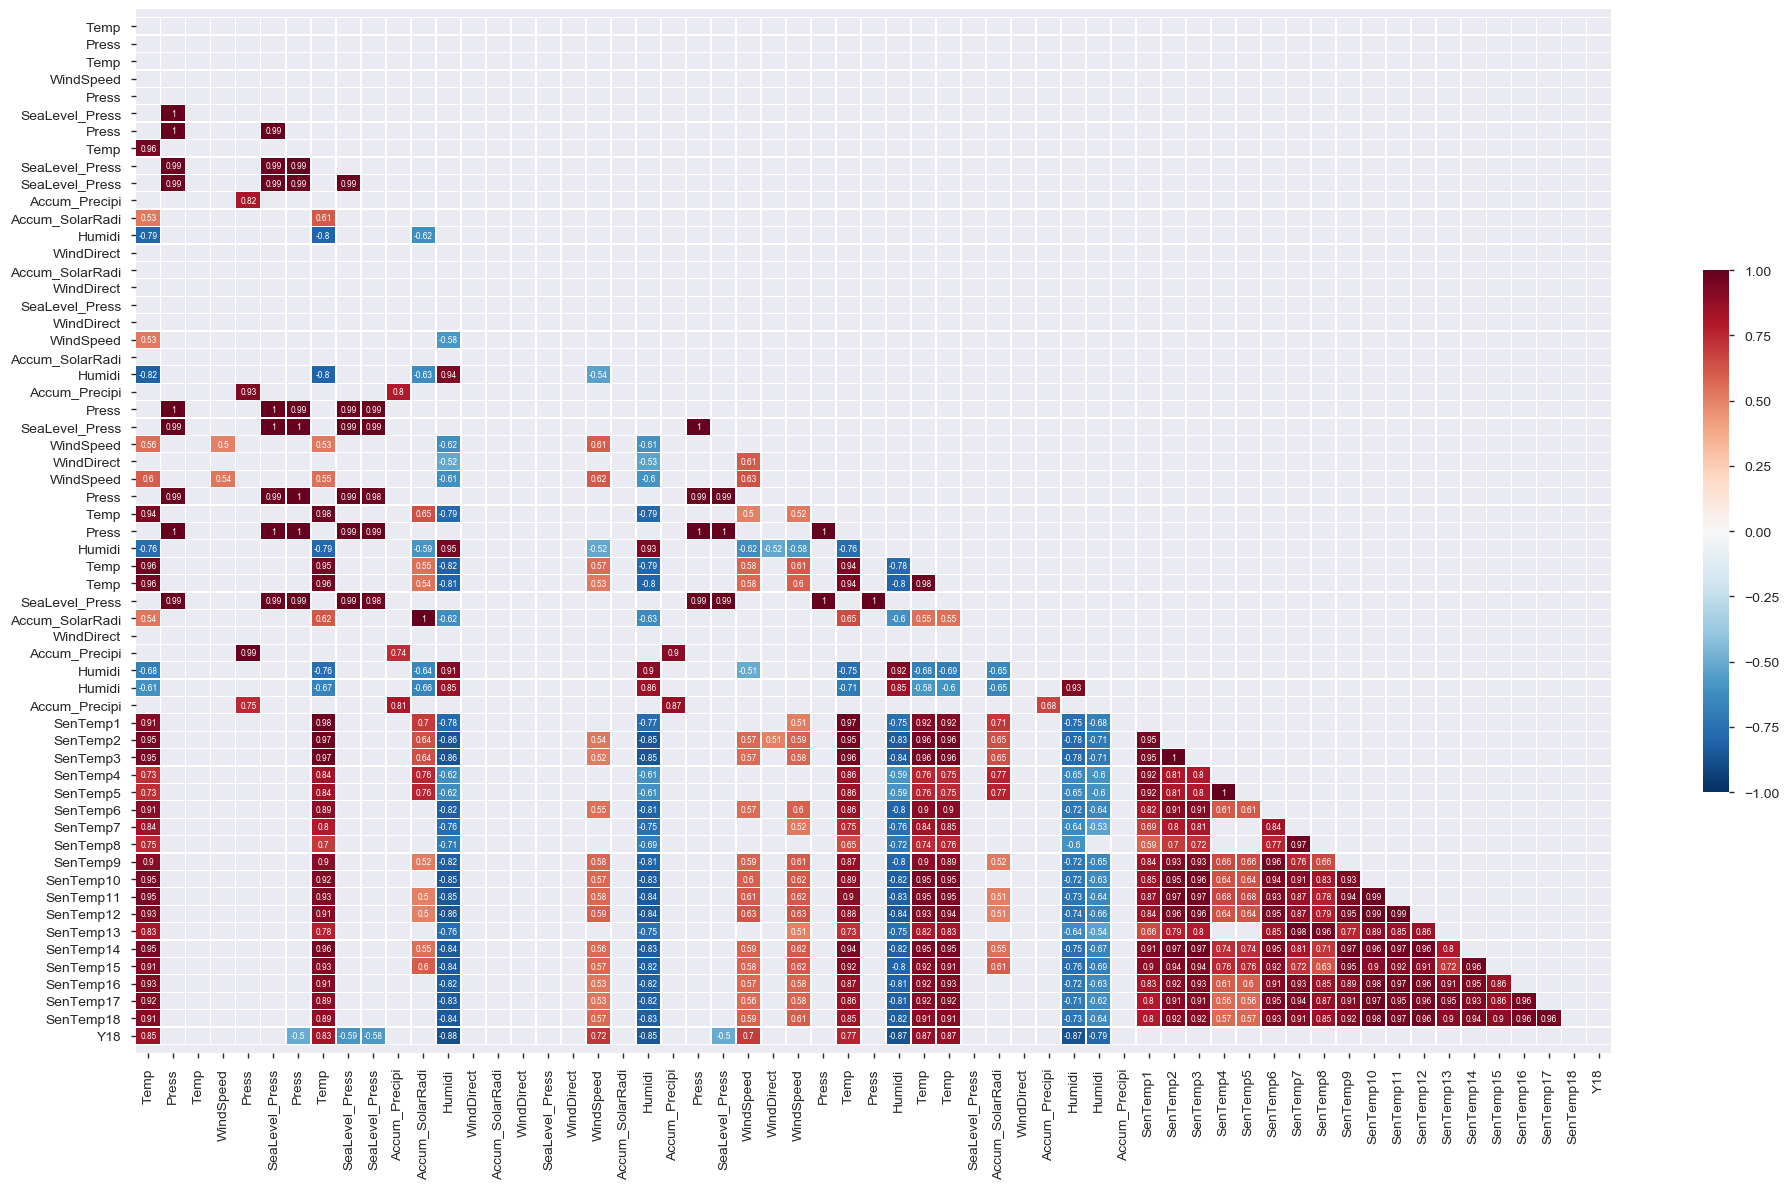

In [16]:
fig, ax = plt.subplots(figsize=(20, 12), dpi=100)

data = train.corr()
mask = np.triu(np.ones_like(data, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data[(data >= 0.5) | (data <= -0.5)], 
            mask=mask,
            vmax=1.0, vmin=-1.0, 
            cmap='RdBu_r', linewidths=0.2,
            annot=True, annot_kws={'size': 6}, 
            square=False, cbar=True,
            cbar_kws={'shrink': .5}, ax=ax)

# for _, spine in ax.spines.items():
#     spine.set_visible(True)
ax.set_ylim(ax.get_ylim()[0]+0.5, ax.get_ylim()[1]-0.5)
fig.tight_layout()
plt.show()

In [17]:
train.head()

,Temp,Press,Temp,WindSpeed,Press,SeaLevel_Press,Press,Temp,SeaLevel_Press,SeaLevel_Press,...,SenTemp10,SenTemp11,SenTemp12,SenTemp13,SenTemp14,SenTemp15,SenTemp16,SenTemp17,SenTemp18,Y18
id,,,,,,,,,,,,,,,,,,,,,
0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,...,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,...,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,...,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,...,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,...,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


C:\Users\jungg\Anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\jungg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\jungg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\jungg\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\jungg\Anaconda3\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warni

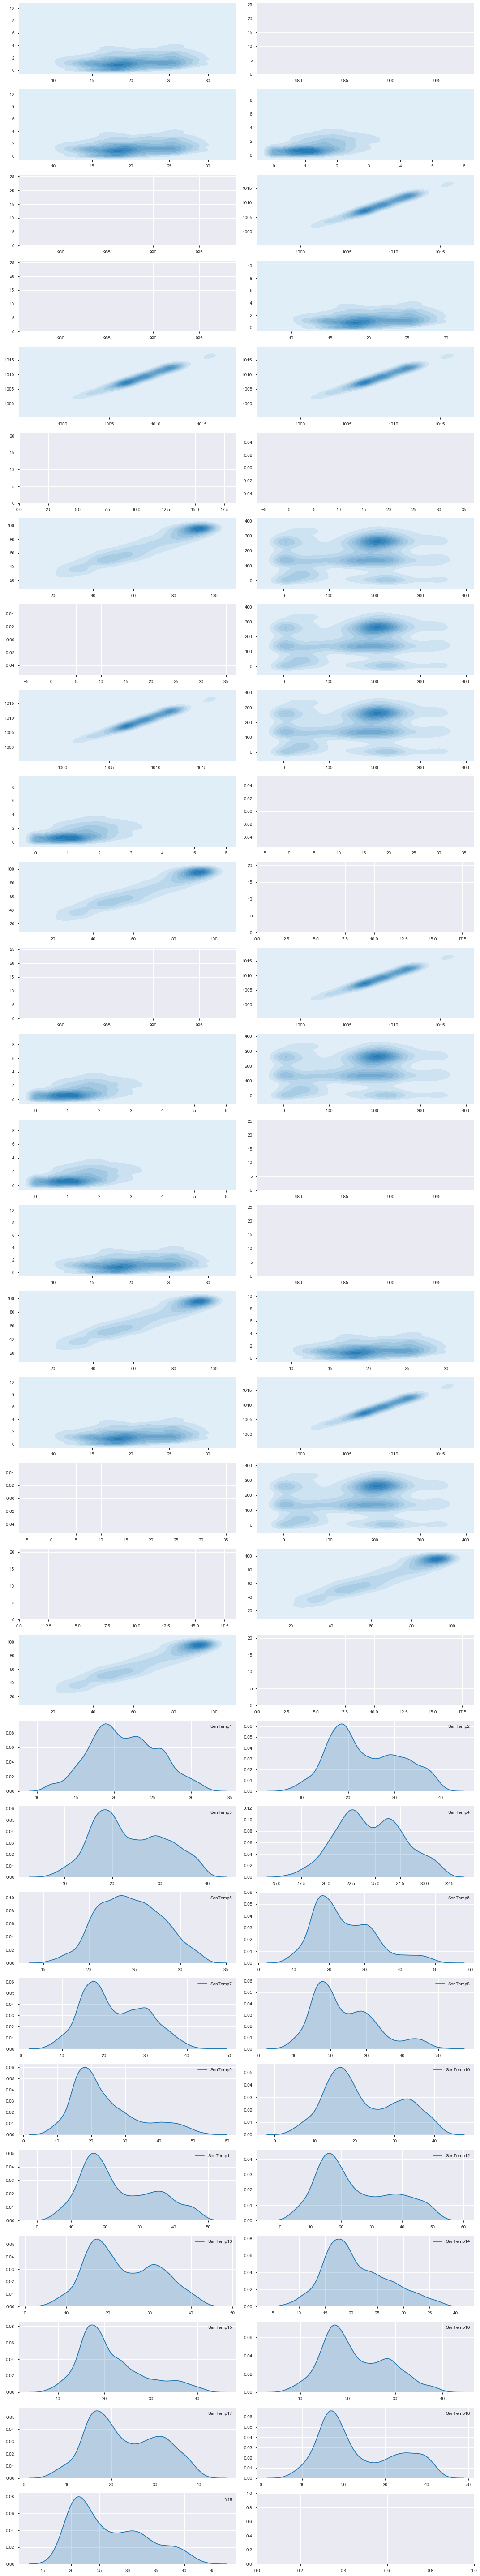

In [18]:
col = train.columns
fig, axes = plt.subplots(30, 2, figsize=(15,80))

for i, column in enumerate(col):    
    #if i>1:
    sns.kdeplot(train[column], shade=True, ax=axes.flat[i])
        
fig.tight_layout()
plt.show()

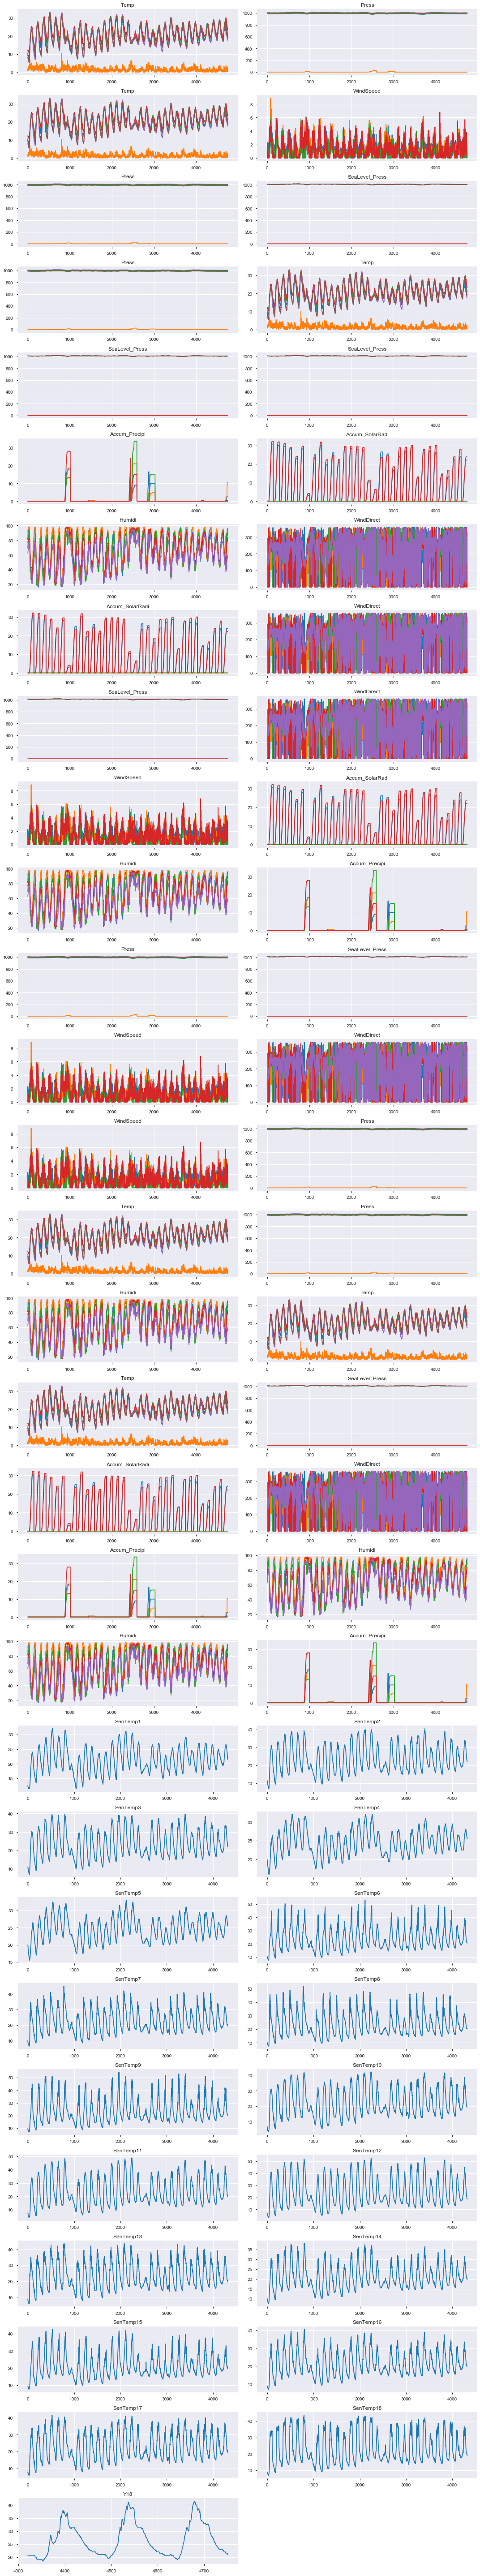

In [19]:
col = train.columns
fig = plt.figure(figsize=(15,80))

for i, column in enumerate(col):    
    plt.subplot(30,2,i+1)
    plt.plot(train[column])
    plt.title(column)
    
fig.tight_layout()
plt.show()

In [20]:
#plt.plot(train['Y00']-train['Y03'])

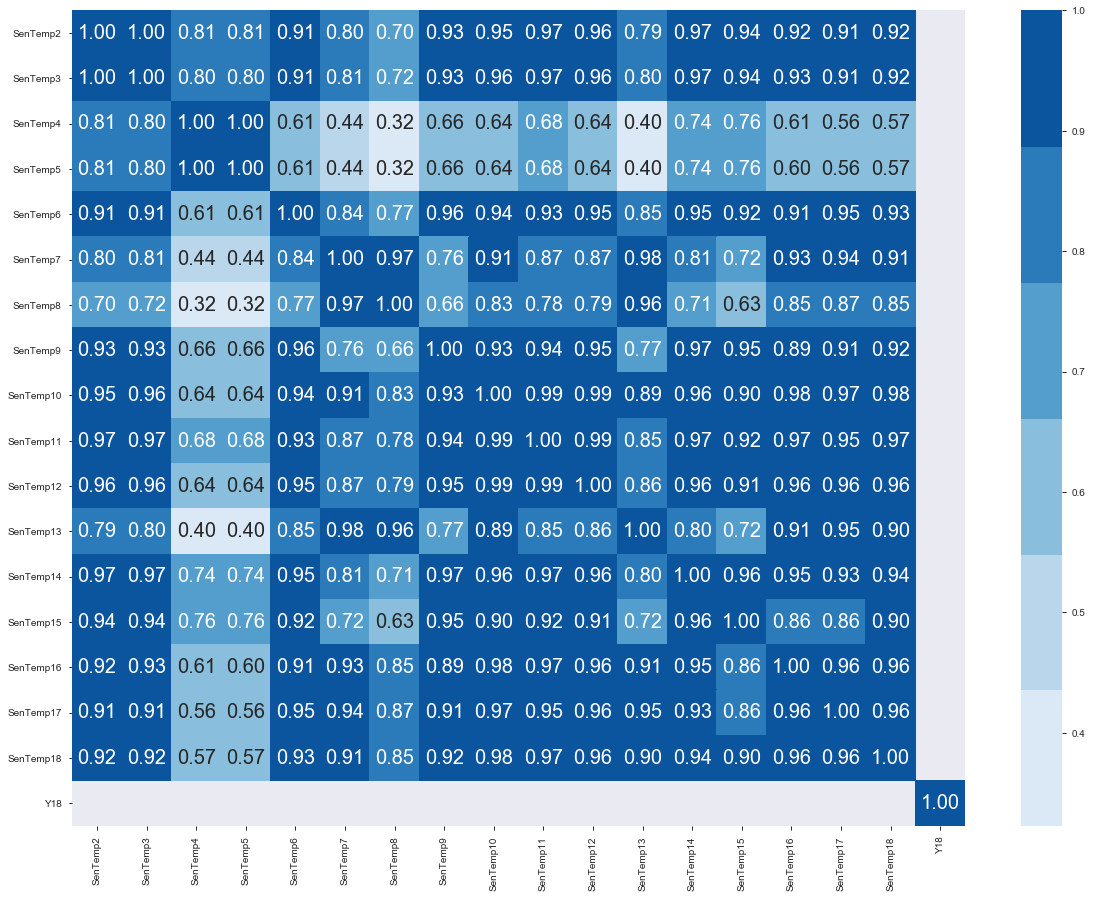

In [21]:
corr = train.iloc[:, 41:].corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, cmap=cmap, annot=True, fmt = ".2f" ,annot_kws={"size": 20})

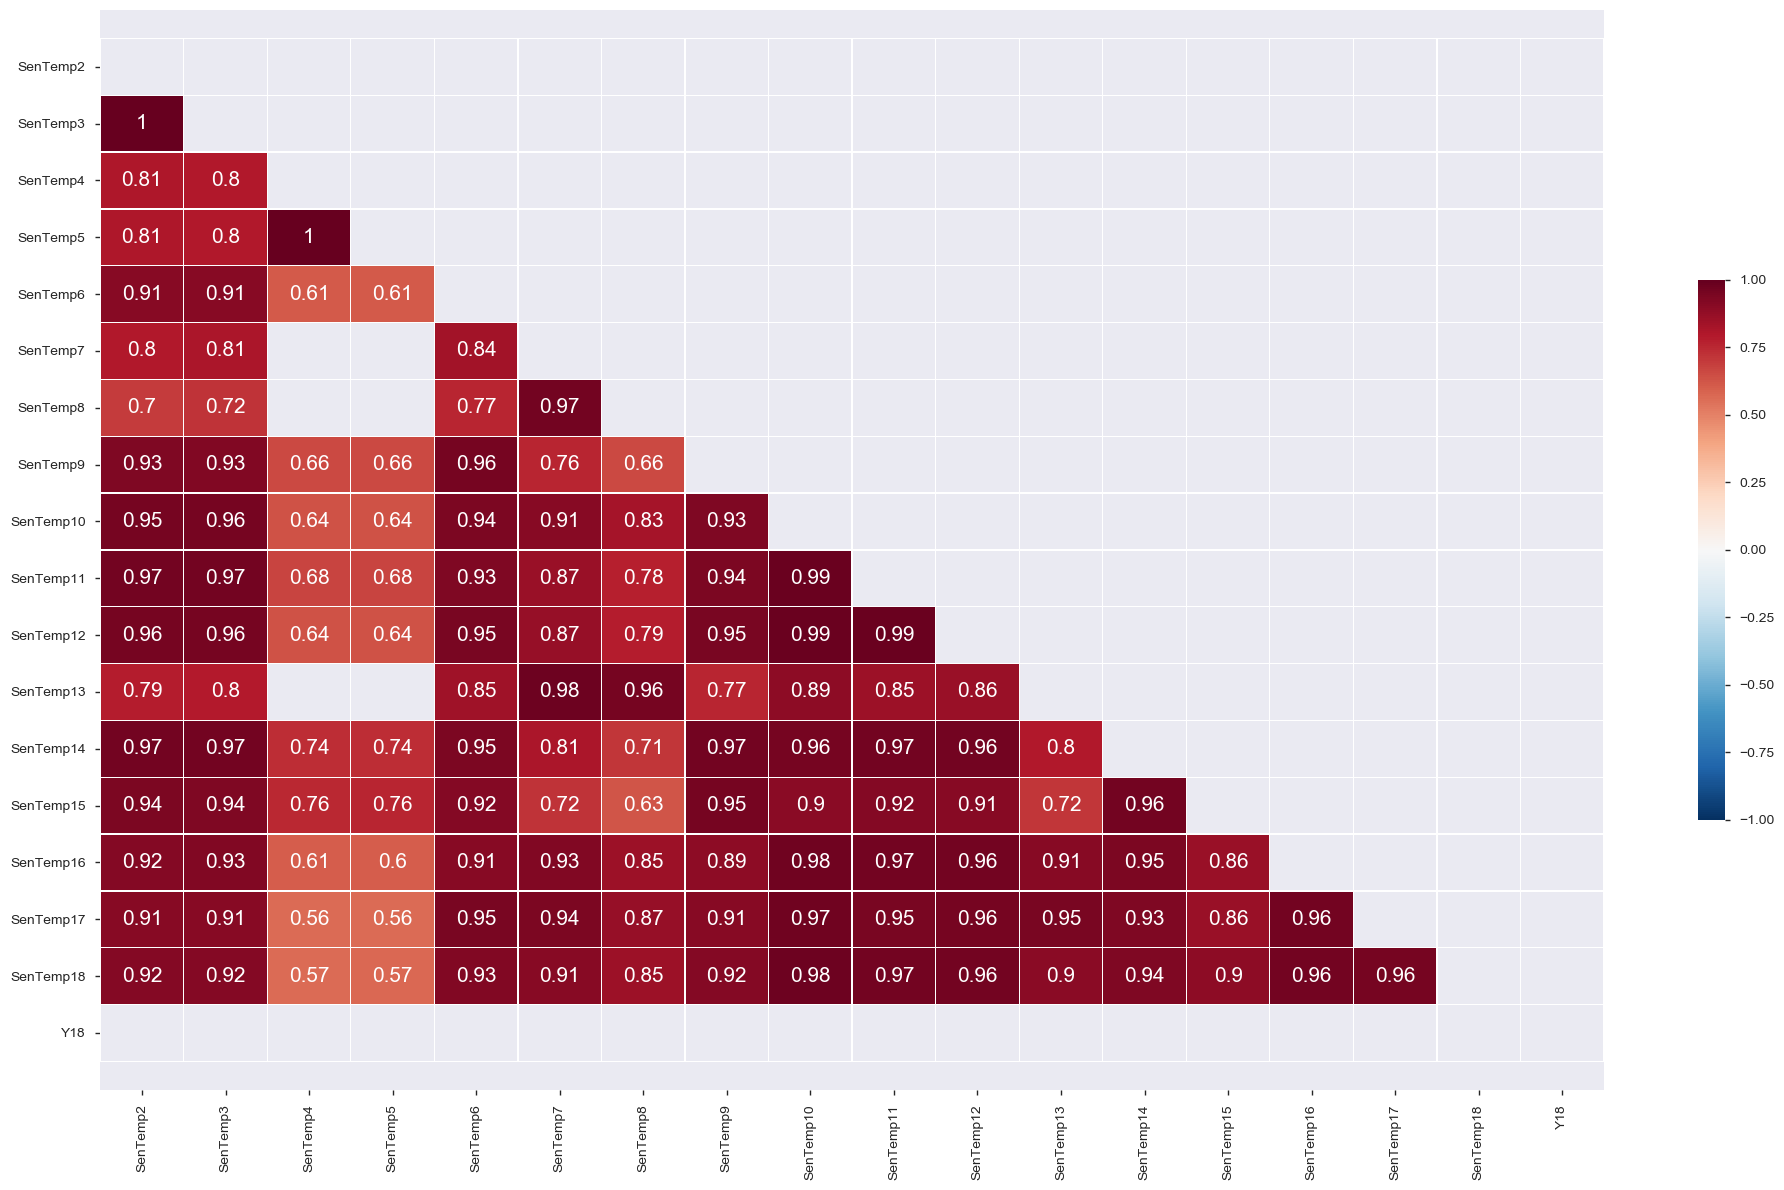

In [22]:
fig, ax = plt.subplots(figsize=(20, 12), dpi=100)

data = train.iloc[:, 41:].corr()
mask = np.triu(np.ones_like(data, dtype=np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data[(data >= 0.5) | (data <= -0.5)], 
            mask=mask,
            vmax=1.0, vmin=-1.0, 
            cmap='RdBu_r', linewidths=0.2,
            annot=True, annot_kws={'size': 15}, 
            square=False, cbar=True,
            cbar_kws={'shrink': .5}, ax=ax)

for _, spine in ax.spines.items():
    spine.set_visible(True)
    
ax.set_ylim(ax.get_ylim()[0]+0.5, ax.get_ylim()[1]-0.5)
fig.tight_layout()
plt.show()

### Y00 ~ Y17 >>> [0:4320]: Value, [4321:]: NaN, Y_index: [41:58]
### Y18 >>> [0:4320]: NaN, [4321:]: Value, Y_index: [59]

In [ ]:
tp=0
k=0

In [ ]:
for i in range(40,58):
    if i != 46 | i != 47 | i != 52:
        tp += train.iloc[0:4320,i]
        k+=1

In [ ]:
train.shape

In [ ]:
train.iloc[0:4320,58]=tp/k

In [ ]:
train.head()

In [ ]:
x=train.iloc[:,1:40]
y=train.iloc[:,58]

In [ ]:
test_x=test.iloc[:,1:]